In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn import random_projection
from sklearn.manifold import MDS
from sklearn.manifold import Isomap

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Optional: KNN
from sklearn.neighbors import KNeighborsClassifier
from collections import defaultdict

from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
features = list()
with open('../features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


In [4]:
X_train = pd.read_csv('X_train.txt', delim_whitespace=True, header=None, encoding='latin-1')
X_train.columns = features

# add subject column to the dataframe
#X_train['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

y_train = pd.read_csv('y_train.txt', names=['Activity'], squeeze=True)
#y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
#                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
#train = X_train
#train['Activity'] = y_train

In [5]:
X_test = pd.read_csv('../test/X_test.txt', delim_whitespace=True, header=None, encoding='latin-1')
X_test.columns = features

# add subject column to the dataframe
#X_test['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

y_test = pd.read_csv('../test/y_test.txt', names=['Activity'], squeeze=True)
#y_test_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
#                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
#train01 = X_test
#train01['Activity'] = y_test

# Naive Bayes

In [6]:
X = X_train.values

In [6]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB

In [7]:
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [8]:
y_pred = clf.predict(X_test)

In [9]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7702748557855447
F1-score [0.83116883 0.84456929 0.70410959 0.65480427 0.8287796  0.73997709]
              precision    recall  f1-score   support

           1       0.82      0.84      0.83       496
           2       0.76      0.96      0.84       471
           3       0.83      0.61      0.70       420
           4       0.58      0.75      0.65       491
           5       0.80      0.86      0.83       532
           6       0.96      0.60      0.74       537

    accuracy                           0.77      2947
   macro avg       0.79      0.77      0.77      2947
weighted avg       0.79      0.77      0.77      2947



In [11]:
X_cat = list()
for i in range(len(X)):
    X_cat.append(pd.qcut(X[i], q=[0.0, 0.25, 0.5, 0.75, 1.0], labels=False))
X_cat = np.array(X_cat)

In [12]:
clf = CategoricalNB()
clf.fit(X_cat, y_train)

CategoricalNB()

In [13]:
y_pred = clf.predict(X_cat)
print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))
print(classification_report(y_train, y_pred))

Accuracy 0.8667029379760609
F1-score [0.92405063 0.88049756 0.8873024  0.76945668 0.79480321 0.95505214]
              precision    recall  f1-score   support

           1       0.96      0.89      0.92      1226
           2       0.84      0.92      0.88      1073
           3       0.89      0.88      0.89       986
           4       0.73      0.81      0.77      1286
           5       0.84      0.76      0.79      1374
           6       0.97      0.94      0.96      1407

    accuracy                           0.87      7352
   macro avg       0.87      0.87      0.87      7352
weighted avg       0.87      0.87      0.87      7352



## Linear Regression

In [75]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.model_selection import train_test_split

In [138]:
# simple linear regression
X = X_train['tBodyAcc-max()-X'].values.reshape(-1, 1)
y = X_train['tBodyAcc-min()-X'].values.reshape(-1,1)

# multiple linear regression
#X = X_train[['tBodyAcc-max()-X', 'tBodyAcc-mean()-X']]
#y = X_train['tBodyAcc-min()-X']

In [139]:
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X, y, test_size=0.3, random_state=0)

In [140]:
reg = LinearRegression()
reg.fit(X_train_linear, y_train_linear)

LinearRegression()

In [141]:
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [[-0.62938481]]
Intercept: 
 [0.22820227]


In [142]:
y_pred = reg.predict(X_test_linear)

In [143]:
print('R2: %.3f' % r2_score(y_test_linear, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test_linear, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test_linear, y_pred))

R2: 0.889
MSE: 0.014
MAE: 0.075


In [144]:
#y_new = np.array(y_test)

In [151]:
#.flatten solo se simple lr
df = pd.DataFrame({'Actual': y_test_linear.flatten(), 'Predicted': y_pred.flatten()})

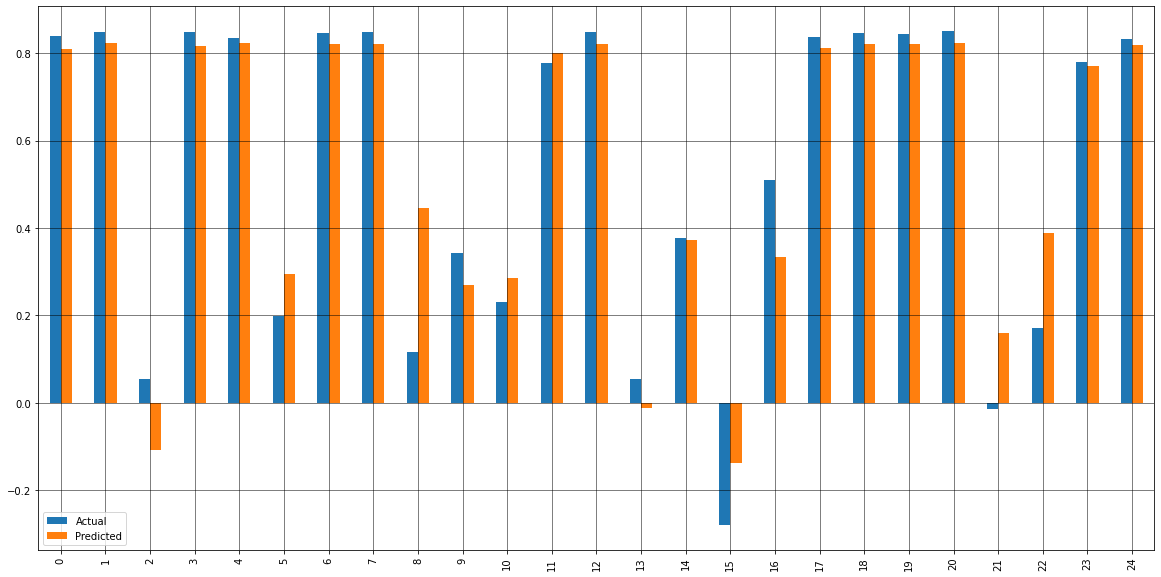

In [149]:
#import random
#i = random.randrange(1,651)
df1 = df.head(25)
df1.plot(kind='bar',figsize=(20,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## Linear Regression in 2 dimensions

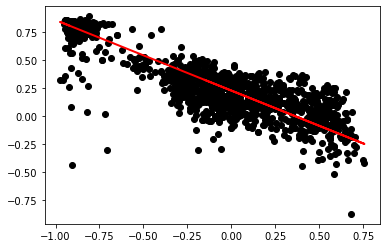

In [150]:
plt.scatter(X_test_linear, y_test_linear,  color='black')
plt.plot(X_test_linear, y_pred, color='red', linewidth=2)
plt.show()

# Lasso

In [102]:
reg = Lasso()
reg.fit(X_train_linear, y_train_linear)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [-0.]
Intercept: 
 [0.51913892]


In [103]:
y_pred = reg.predict(X_test_linear)
print('R2: %.3f' % r2_score(y_test_linear, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test_linear, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test_linear, y_pred))

R2: -0.002
MSE: 0.128
MAE: 0.333


# Ridge

In [104]:
reg = Ridge()
reg.fit(X_train_linear, y_train_linear)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [[-0.62897653]]
Intercept: 
 [0.228391]


In [105]:
y_pred = reg.predict(X_test_linear)
print('R2: %.3f' % r2_score(y_test_linear, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test_linear, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test_linear, y_pred))

R2: 0.889
MSE: 0.014
MAE: 0.075


# Logistic Regression

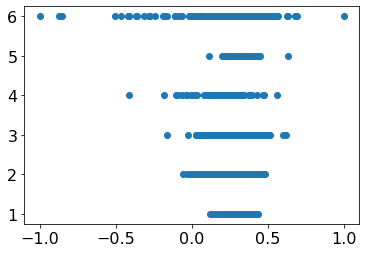

In [20]:
plt.scatter(X.T[0], y_train)
#plt.xlabel(selected_columns[0], fontsize=16)
#plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [29]:
clf = LogisticRegression(random_state=0)
clf.fit(X.T[0].reshape(-1,1), y_train)

LogisticRegression(random_state=0)

In [23]:
y_pred = clf.predict(Xt.T[0].reshape(-1,1))

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       496
           2       0.11      0.00      0.00       471
           3       0.71      0.01      0.02       420
           4       0.00      0.00      0.00       491
           5       0.07      0.10      0.08       532
           6       0.20      0.79      0.31       537

    accuracy                           0.16      2947
   macro avg       0.18      0.15      0.07      2947
weighted avg       0.17      0.16      0.08      2947



## Linear SVM 

In [32]:
from sklearn.svm import LinearSVC

In [33]:
clf = LinearSVC(C=1.0, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9660671869697998
F1-score [0.98023715 0.97216274 0.99159664 0.91909385 0.93705036 0.99814126]
              precision    recall  f1-score   support

           1       0.96      1.00      0.98       496
           2       0.98      0.96      0.97       471
           3       1.00      0.98      0.99       420
           4       0.98      0.87      0.92       491
           5       0.90      0.98      0.94       532
           6       1.00      1.00      1.00       537

    accuracy                           0.97      2947
   macro avg       0.97      0.97      0.97      2947
weighted avg       0.97      0.97      0.97      2947



In [34]:
clf = LinearSVC(C=100.0, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9650492025788938
F1-score [0.98409543 0.97545358 0.99040767 0.91166848 0.93238434 0.99814126]
              precision    recall  f1-score   support

           1       0.97      1.00      0.98       496
           2       0.98      0.97      0.98       471
           3       1.00      0.98      0.99       420
           4       0.98      0.85      0.91       491
           5       0.89      0.98      0.93       532
           6       1.00      1.00      1.00       537

    accuracy                           0.97      2947
   macro avg       0.97      0.96      0.97      2947
weighted avg       0.97      0.97      0.96      2947



In [35]:
clf = LinearSVC(C=0.001, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9412962334577536
F1-score [0.96       0.94994675 0.95705521 0.88135593 0.89963504 0.99906977]
              precision    recall  f1-score   support

           1       0.93      0.99      0.96       496
           2       0.95      0.95      0.95       471
           3       0.99      0.93      0.96       420
           4       0.92      0.85      0.88       491
           5       0.87      0.93      0.90       532
           6       1.00      1.00      1.00       537

    accuracy                           0.94      2947
   macro avg       0.94      0.94      0.94      2947
weighted avg       0.94      0.94      0.94      2947



In [36]:
clf = LinearSVC(C=66, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9667458432304038
F1-score [0.98507463 0.97446809 0.99040767 0.91782284 0.93647913 0.99814126]
              precision    recall  f1-score   support

           1       0.97      1.00      0.99       496
           2       0.98      0.97      0.97       471
           3       1.00      0.98      0.99       420
           4       0.96      0.88      0.92       491
           5       0.91      0.97      0.94       532
           6       1.00      1.00      1.00       537

    accuracy                           0.97      2947
   macro avg       0.97      0.97      0.97      2947
weighted avg       0.97      0.97      0.97      2947



# Ensemble methods

# Random forest

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9253478113335596
F1-score [0.9328215  0.9015873  0.89961881 0.8988764  0.90721649 1.        ]
              precision    recall  f1-score   support

           1       0.89      0.98      0.93       496
           2       0.90      0.90      0.90       471
           3       0.96      0.84      0.90       420
           4       0.90      0.90      0.90       491
           5       0.90      0.91      0.91       532
           6       1.00      1.00      1.00       537

    accuracy                           0.93      2947
   macro avg       0.93      0.92      0.92      2947
weighted avg       0.93      0.93      0.93      2947



In [8]:
y_score = clf.predict_proba(X_test)

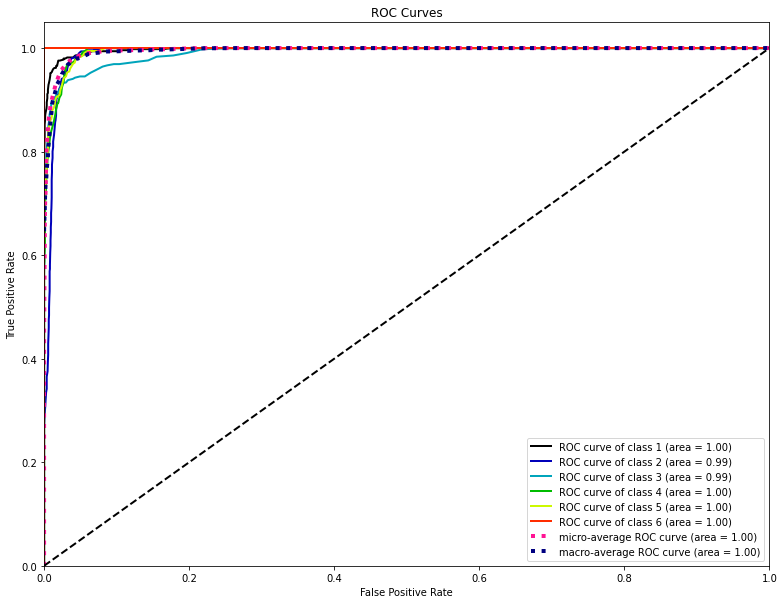

In [18]:
plot_roc(y_test, y_score, figsize=(13,10))
plt.show()

In [9]:
import json
json.dumps(classification_report(y_test, y_pred, output_dict=True))

'{"1": {"precision": 0.8901098901098901, "recall": 0.9798387096774194, "f1-score": 0.9328214971209212, "support": 496}, "2": {"precision": 0.8987341772151899, "recall": 0.9044585987261147, "f1-score": 0.9015873015873016, "support": 471}, "3": {"precision": 0.9645776566757494, "recall": 0.8428571428571429, "f1-score": 0.8996188055908515, "support": 420}, "4": {"precision": 0.9016393442622951, "recall": 0.8961303462321792, "f1-score": 0.8988764044943821, "support": 491}, "5": {"precision": 0.9046728971962616, "recall": 0.9097744360902256, "f1-score": 0.9072164948453608, "support": 532}, "6": {"precision": 1.0, "recall": 1.0, "f1-score": 1.0, "support": 537}, "accuracy": 0.9253478113335596, "macro avg": {"precision": 0.9266223275765643, "recall": 0.9221765389305135, "f1-score": 0.9233534172731362, "support": 2947}, "weighted avg": {"precision": 0.9266752012581856, "recall": 0.9253478113335596, "f1-score": 0.9250608991626152, "support": 2947}}'

In [10]:
json.loads(json.dumps(classification_report(y_test, y_pred, output_dict=True)))

{'1': {'precision': 0.8901098901098901,
  'recall': 0.9798387096774194,
  'f1-score': 0.9328214971209212,
  'support': 496},
 '2': {'precision': 0.8987341772151899,
  'recall': 0.9044585987261147,
  'f1-score': 0.9015873015873016,
  'support': 471},
 '3': {'precision': 0.9645776566757494,
  'recall': 0.8428571428571429,
  'f1-score': 0.8996188055908515,
  'support': 420},
 '4': {'precision': 0.9016393442622951,
  'recall': 0.8961303462321792,
  'f1-score': 0.8988764044943821,
  'support': 491},
 '5': {'precision': 0.9046728971962616,
  'recall': 0.9097744360902256,
  'f1-score': 0.9072164948453608,
  'support': 532},
 '6': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 537},
 'accuracy': 0.9253478113335596,
 'macro avg': {'precision': 0.9266223275765643,
  'recall': 0.9221765389305135,
  'f1-score': 0.9233534172731362,
  'support': 2947},
 'weighted avg': {'precision': 0.9266752012581856,
  'recall': 0.9253478113335596,
  'f1-score': 0.9250608991626152,
  'support': 2947

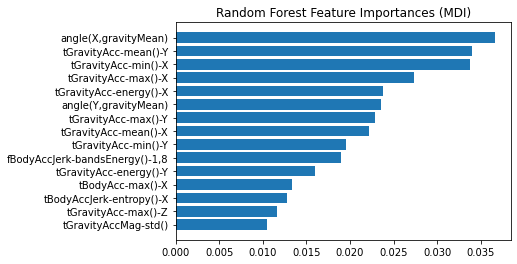

In [21]:
nbr_features = 15

tree_feature_importances = clf.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]

y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(features)[sorted_idx])
plt.title("Random Forest Feature Importances (MDI)")
plt.show()

In [22]:
from sklearn.inspection import permutation_importance

In [23]:
result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

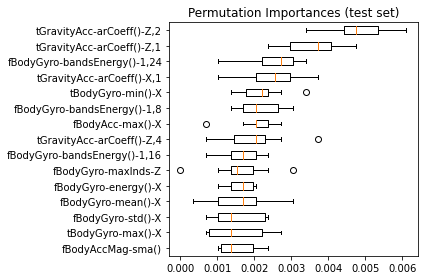

In [24]:
sorted_idx = result.importances_mean.argsort()[-nbr_features:]

fig, ax = plt.subplots()
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(features)[sorted_idx])
plt.title("Permutation Importances (test set)")
plt.tight_layout()
plt.show()

In [48]:
dot_data = tree.export_graphviz(clf.estimators_[1], out_file=None,  
                                feature_names=features, 
                                class_names=['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING'],
                                filled=True, rounded=True,  
                                special_characters=True, max_depth=4)  
graph = pydotplus.graph_from_dot_data(dot_data)

In [49]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=4, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.92      0.98      0.95       496
           2       0.89      0.94      0.92       471
           3       0.95      0.82      0.88       420
           4       0.97      0.85      0.91       491
           5       0.88      0.98      0.93       532
           6       0.99      0.99      0.99       537

    accuracy                           0.93      2947
   macro avg       0.93      0.93      0.93      2947
weighted avg       0.93      0.93      0.93      2947



In [50]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='log2', random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.91      0.97      0.94       496
           2       0.90      0.94      0.92       471
           3       0.95      0.84      0.89       420
           4       0.97      0.90      0.93       491
           5       0.91      0.97      0.94       532
           6       1.00      1.00      1.00       537

    accuracy                           0.94      2947
   macro avg       0.94      0.94      0.94      2947
weighted avg       0.94      0.94      0.94      2947



### Cross Validation

In [51]:
from sklearn.model_selection import cross_val_score

In [52]:
clf = RandomForestClassifier()
scores = cross_val_score(clf, X_train, y_train, cv=5) #non ricordo se ci va il train

print('Accuracy %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Accuracy 0.915 +/- 0.019


### Tuning the hyper-parameters

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [54]:
param_list = {'min_samples_split': [2, 5, 10, 20],
              'min_samples_leaf': [1, 5, 10, 20],
             }

grid_search = GridSearchCV(clf, param_grid=param_list, cv=5)
grid_search.fit(X_train, y_train)
clf = grid_search.best_estimator_

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.88      0.98      0.93       496
           2       0.88      0.90      0.89       471
           3       0.97      0.83      0.90       420
           4       0.92      0.89      0.90       491
           5       0.90      0.93      0.91       532
           6       1.00      1.00      1.00       537

    accuracy                           0.92      2947
   macro avg       0.93      0.92      0.92      2947
weighted avg       0.93      0.92      0.92      2947



In [55]:
param_list = {'max_depth': [None] + list(np.arange(2, 20)),
              'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
              'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
             }

random_search = RandomizedSearchCV(clf, param_distributions=param_list, n_iter=20, cv=5)
random_search.fit(X_train, y_train)
clf = random_search.best_estimator_


y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.86      0.97      0.91       496
           2       0.89      0.89      0.89       471
           3       0.96      0.82      0.88       420
           4       0.91      0.88      0.89       491
           5       0.89      0.92      0.91       532
           6       1.00      1.00      1.00       537

    accuracy                           0.92      2947
   macro avg       0.92      0.91      0.91      2947
weighted avg       0.92      0.92      0.92      2947



In [56]:
random_search.cv_results_['params'][random_search.cv_results_['rank_test_score'][0]]

{'min_samples_split': 20, 'min_samples_leaf': 30, 'max_depth': 2}

# Bagging

In [35]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

In [36]:
clf = BaggingClassifier(base_estimator=None, n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.87      0.96      0.91       496
           2       0.88      0.83      0.86       471
           3       0.93      0.87      0.90       420
           4       0.88      0.80      0.84       491
           5       0.83      0.89      0.86       532
           6       1.00      1.00      1.00       537

    accuracy                           0.90      2947
   macro avg       0.90      0.89      0.89      2947
weighted avg       0.90      0.90      0.90      2947



In [44]:
clf = BaggingClassifier(base_estimator=SVC(), n_estimators=100, random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.95      0.98      0.96       496
           2       0.94      0.96      0.95       471
           3       0.99      0.92      0.95       420
           4       0.94      0.89      0.92       491
           5       0.91      0.95      0.93       532
           6       1.00      1.00      1.00       537

    accuracy                           0.95      2947
   macro avg       0.95      0.95      0.95      2947
weighted avg       0.95      0.95      0.95      2947



In [45]:
clf = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.90      0.98      0.94       496
           2       0.90      0.93      0.92       471
           3       0.96      0.84      0.89       420
           4       0.90      0.88      0.89       491
           5       0.89      0.91      0.90       532
           6       1.00      1.00      1.00       537

    accuracy                           0.93      2947
   macro avg       0.93      0.92      0.92      2947
weighted avg       0.93      0.93      0.93      2947



In [43]:
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.87      0.96      0.91       496
           2       0.88      0.83      0.86       471
           3       0.93      0.87      0.90       420
           4       0.88      0.80      0.84       491
           5       0.83      0.89      0.86       532
           6       1.00      1.00      1.00       537

    accuracy                           0.90      2947
   macro avg       0.90      0.89      0.89      2947
weighted avg       0.90      0.90      0.90      2947



# Boosting

In [8]:
from sklearn.ensemble import AdaBoostClassifier

In [12]:
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.82      0.91      0.86       496
           2       0.82      0.77      0.80       471
           3       0.87      0.81      0.84       420
           4       0.83      0.77      0.80       491
           5       0.80      0.86      0.83       532
           6       1.00      1.00      1.00       537

    accuracy                           0.86      2947
   macro avg       0.86      0.85      0.85      2947
weighted avg       0.86      0.86      0.86      2947



In [13]:
clf = AdaBoostClassifier(base_estimator=RandomForestClassifier(), n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.88      0.96      0.92       496
           2       0.90      0.90      0.90       471
           3       0.95      0.85      0.90       420
           4       0.92      0.88      0.90       491
           5       0.89      0.93      0.91       532
           6       1.00      1.00      1.00       537

    accuracy                           0.92      2947
   macro avg       0.92      0.92      0.92      2947
weighted avg       0.92      0.92      0.92      2947



# Gradient Boosting

In [6]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=3, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [ ]:
clf = HistGradientBoostingClassifier(learning_rate=1.0, max_depth=3, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

# XGBoost

In [74]:
from xgboost import XGBClassifier